## Week5 LinearRegression

In week 5, we've covered:
* Basic machine learning concepts and workflow
* Linear regression
  
  
In this notebook,  we will work on the Boston housing dataset and build a linear regression model to predict value of houses.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). The Boston housing data was collected in 1978 and each of the 506 entries represents aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.  
  
  
A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.  
  
  
Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a **TODO** statement and "____"
.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

Upload **Week5_LinearRegression_Homework.ipynb** and **housing.csv** to Google Drive.

----
## 1. Import Libraries
Import pandas, numpy, matplotlib and seaborn. Then set %matplotlib inline.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


---
## 2. Load Data
Read in the housing.csv file as a DataFrame called `data`.

In [2]:
# Upload housing.csv to your google Drive then read the data using pandas.

data = pd.read_csv('housing.csv')

# Success
print("Boston housing dataset has {} data points with {} columns.".format(*data.shape))

Boston housing dataset has 489 data points with 4 columns.


---
## 3. Explore Data

Familiarizing ourself with the data through an explorative process is a fundamental practice to help us better understand and justify our results.

In [3]:
data.head(5)


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [5]:

data.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**.  
  

The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point.   
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.   
  
The **target variable**, `'MEDV'`, will be the variable we seek to predict.  

In [7]:
features = ['RM', 'LSTAT', 'PTRATIO']
target = 'MEDV'


Calculate Statistics
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`.
- Store each calculation in their respective variable.
- Use `numpy` to perform the necessary calcualtions.

In [10]:
# TODO: Minimum price of the data
minimum_price = min(data['MEDV'])

# TODO: Maximum price of the data
maximum_price = max(data['MEDV'])

# TODO: Mean price of the data
mean_price = np.average(data['MEDV'])

# TODO: Median price of the data
median_price = np.median(data['MEDV'])

# TODO: Standard deviation of prices of the data
std_price = np.std(data['MEDV'])

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price))
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429477


Observe features

For each of the three features **RM**, **LSTAT**, **PTRATIO**:
  * Do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`?
  * Show the data using appropriate plot and justify your answer for each.

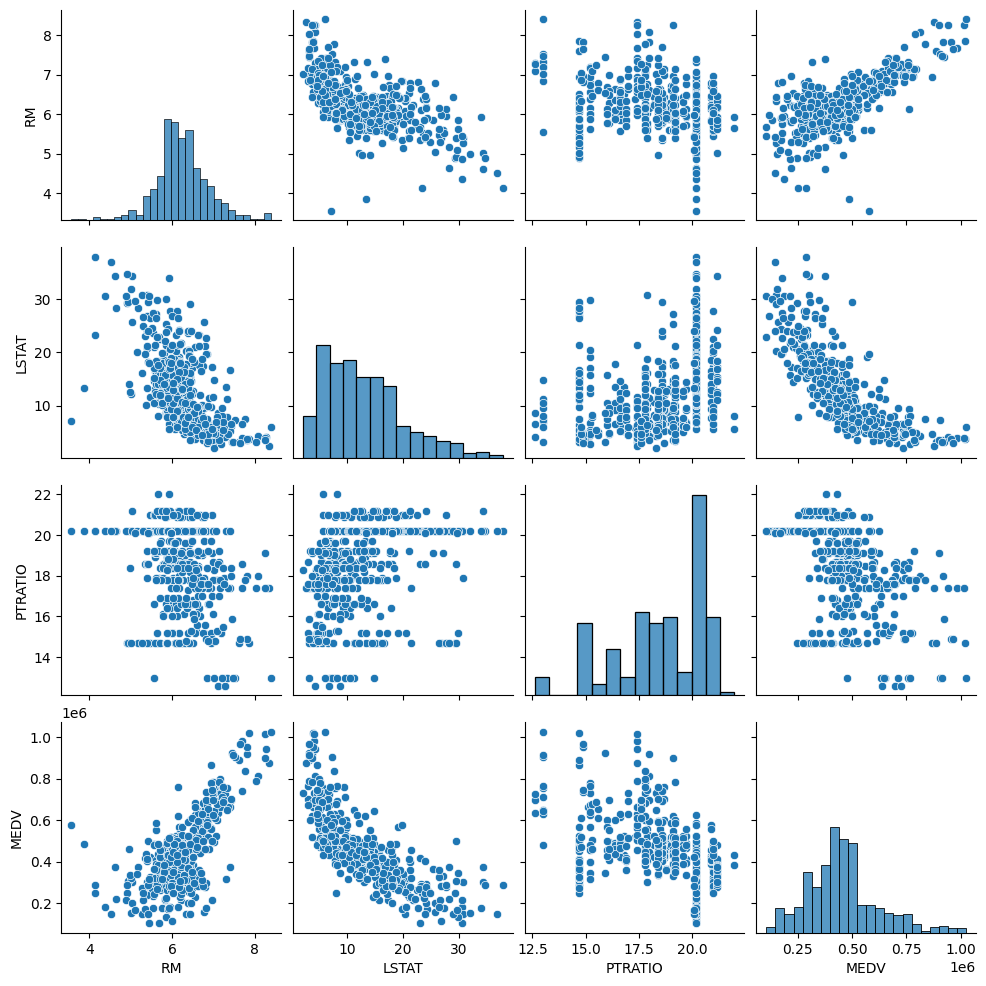

In [11]:
sns.pairplot(data)


**Answer**:    TODO  


----

## 4. Develop Model

Split data to get training and testing Data.

In [14]:
from sklearn.model_selection import train_test_split

# Suppose X contains features and y contains the target
X = data[['RM', 'LSTAT', 'PTRATIO']]   # feature matrix
y = data['MEDV']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check the shape of splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (391, 3)
X_test shape: (98, 3)
y_train shape: (391,)
y_test shape: (98,)


Why should we perform feature scailing?

**Answer**:    TODO


Create linear regression object

In [15]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

# Fit model on training data
lin_reg.fit(X_train, y_train)

print("Intercept:", lin_reg.intercept_)
print("Coefficients:", lin_reg.coef_)



Intercept: 408027.654168077
Coefficients: [ 87322.20361861 -10620.63731522 -19324.4102965 ]


Train/fit **lm** on the training data.

In [17]:
model=lin_reg.fit(X_train,y_train)


Display a dataframe with the features and their corresponding coefficients in descending order. Think about how would you interprete the results here.

In [19]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lin_reg.coef_
})

# Sort by coefficient (descending)
coef_df = coef_df.sort_values(by='Coefficient', ascending=False).reset_index(drop=True)

print(coef_df)

   Feature   Coefficient
0       RM  87322.203619
1    LSTAT -10620.637315
2  PTRATIO -19324.410296


## 5. Make Prediction

Now we have a trained model, let's make some predictions and evaluate the model's performance.

Use **lm.predict( )** to predict house prices for **X_test** data set.

In [20]:
predictions=lin_reg.predict(X_test)


Create a scatterplot of **y_test** versus the predicted values.

In [21]:
results=pd.DataFrame({'Predicted':predictions,'Actual':y_test})
results.head()


,Predicted,Actual
451,342593.790298,401100.0
84,506257.091630,501900.0
434,410499.931662,319200.0
472,237792.741154,147000.0
428,327005.796532,247800.0


## 6. Evaluate Model

It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement.

Let's evaluate the model performance by calculating the Adjusted $R^2$.  

What's the benefit of using Adjusted $R^2$ versus $R^2$?

**Answer**:   The adjusted R2 is moderately strong which means I would say this data fits a lienar pattern.


Now calculate Adjusted $R^2$ for train set and test set. Hint: $R^2_{adj.}=1-(1-R^2)*\frac{n-1}{n-p-1}$

In [22]:
import numpy as np
from sklearn.metrics import r2_score

# Get predictions
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

# Calculate R2
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Number of samples and predictors
n_train, p = X_train.shape
n_test = X_test.shape[0]

# Adjusted R2 formula
adj_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p - 1)
adj_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p - 1)

print("Train R2:", r2_train)
print("Train Adjusted R2:", adj_r2_train)
print("Test R2:", r2_test)
print("Test Adjusted R2:", adj_r2_test)



Train R2: 0.7194530968926247
Train Adjusted R2: 0.7172783146979939
Test R2: 0.691093400309851
Test Adjusted R2: 0.681234679043144


## THE END, WELL DONE!

## Submission

Download completed **Week5_LinearRegression_Homework.ipynb** from Google Colab and commit to your personal Github repo you shared with the faculty.